Installing the necesary dependencies and auxiliar libraries like gdal, wheel and pipwin to avoid errors

In [ ]:
pip install wheel pipwin

In [ ]:

pip install wheel
pip install pipwin

pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install geopandas

Import the necessary libraries

In [4]:

import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import os.path

from shapely.geometry import Polygon
from os import path

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")


Read the shp file to crop and validate its information

In [8]:
road_map_at_path = "data/SISBELAGO/SISBELAGOGDPolygon.shp"
road_map_at = gpd.read_file(road_map_at_path)
road_map_at

ANFANGDATU BAUKENN         BAUKENN_TX BELAG  \
0      2013-05-28    None               None    GA   
1      2015-11-27    None               None    GA   
2      2013-05-28    None               None    KB   
3      2021-07-15    None               None    GO   
4      2021-04-20       U              Umbau    AB   
...           ...     ...                ...   ...   
15583  2022-05-30    None               None    ZP   
15584  2022-05-30       U              Umbau    ZP   
15585  2022-01-12    None               None    GA   
15586  2022-01-12    None               None    GA   
15587  2022-01-12       B  Belagsaufbringung    GA   

                             BELAG_TXT BEZIRK BORDSTA ERHALTUNG  \
0                 Gussasphalt Gehsteig     02       3      PRIV   
1                 Gussasphalt Gehsteig     02       3      MA28   
2                           kein Belag     02       1      MA42   
3      Großsteinpfl. ohne Fugenverguss     02    None      MA28   
4                         Asphaltbeton     02    None      MA28   
...                                ...    ...     ...       ...   
15583               Zementbetonplatten     01    None        WL   
15584               Zementbetonplatten     01       3        WL   
15585             Gussasphalt Gehsteig     02       4      MA28   
15586             Gussasphalt Gehsteig     02       4      PRIV   
15587             Gussasphalt Gehsteig     02       4      MA28   

                      ERHALTUNG_  FLAECHE  ... TYPE  \
0                        Private   59.674  ...   GG   
1      Straßenbau und Verwaltung    0.050  ...   GG   
2                 Stadtgartenamt    4.370  ...   UN   
3      Straßenbau und Verwaltung   13.079  ...   GG   
4      Straßenbau und Verwaltung    2.894  ...   IS   
...                          ...      ...  ...  ...   
15583              Wiener Linien    0.004  ...   TS   
15584              Wiener Linien   15.110  ...   IS   
15585  Straßenbau und Verwaltung   43.779  ...   GG   
15586                    Private   10.529  ...   EE   
15587  Straßenbau und Verwaltung   45.018  ...   GG   

                          TYPE_TXT  UMFANG  UPDATEDATU  VERWALTUNG  \
0                         Gehsteig  39.014  2022-08-07        MA28   
1                         Gehsteig   1.331  2022-08-07        MA28   
2                    Unbefestigtes   8.275  2022-08-07        MA28   
3                         Gehsteig  19.718  2022-08-07        MA28   
4                            Insel   7.949  2022-08-07        MA28   
...                            ...     ...         ...         ...   
15583  selbstständiger Gleiskörper   2.283  2022-08-08        MA28   
15584                        Insel  56.044  2022-08-08        MA28   
15585                     Gehsteig  32.869  2022-08-08        MA28   
15586                     Einfahrt  12.983  2022-08-08        MA28   
15587                     Gehsteig  33.041  2022-08-08        MA28   

                      VERWALTUN0 WERTIGKEIT      WERTIGKEI0    SE_SDO_ROW  \
0      Straßenbau und Verwaltung          L    Landesstraße  2.043341e+09   
1      Straßenbau und Verwaltung          L    Landesstraße  2.043341e+09   
2      Straßenbau und Verwaltung          L    Landesstraße  2.043341e+09   
3      Straßenbau und Verwaltung          L    Landesstraße  2.043341e+09   
4      Straßenbau und Verwaltung          L    Landesstraße  2.043341e+09   
...                          ...        ...             ...           ...   
15583  Straßenbau und Verwaltung          G  Gemeindestraße  2.043381e+09   
15584  Straßenbau und Verwaltung          G  Gemeindestraße  2.043381e+09   
15585  Straßenbau und Verwaltung          L    Landesstraße  2.043383e+09   
15586  Straßenbau und Verwaltung          L    Landesstraße  2.043383e+09   
15587  Straßenbau und Verwaltung          L    Landesstraße  2.043383e+09   

                                                geometry  
0      POLYGON ((4126.946 342863.931, 4113.711 342872...  
1      P

Take the dimensions of the shp file and make a grid for clip it

17 20


<AxesSubplot:>

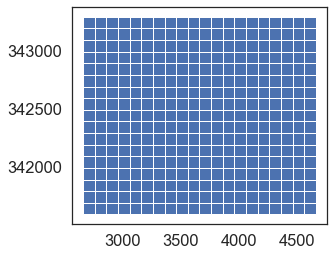

In [39]:
points = road_map_at
xmin,ymin,xmax,ymax =  points.total_bounds
cell_width = 100
cell_height = 100
rows = int(np.ceil((ymax-ymin) /  cell_height))
cols = int(np.ceil((xmax-xmin) / cell_width))
print(rows, cols)
XleftOrigin = xmin
XrightOrigin = xmin + cell_width
YtopOrigin = ymax
YbottomOrigin = ymax- cell_height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ybottom
        Ybottom = Ybottom - cell_height
    XleftOrigin = XrightOrigin
    XrightOrigin = XrightOrigin + cell_width

grid = gpd.GeoDataFrame({'geometry':polygons})
#grid.to_file("grid.shp") if we want to save it has a shp file with all the other necessary files
grid.plot()

Plot the shp overlaid with the grid

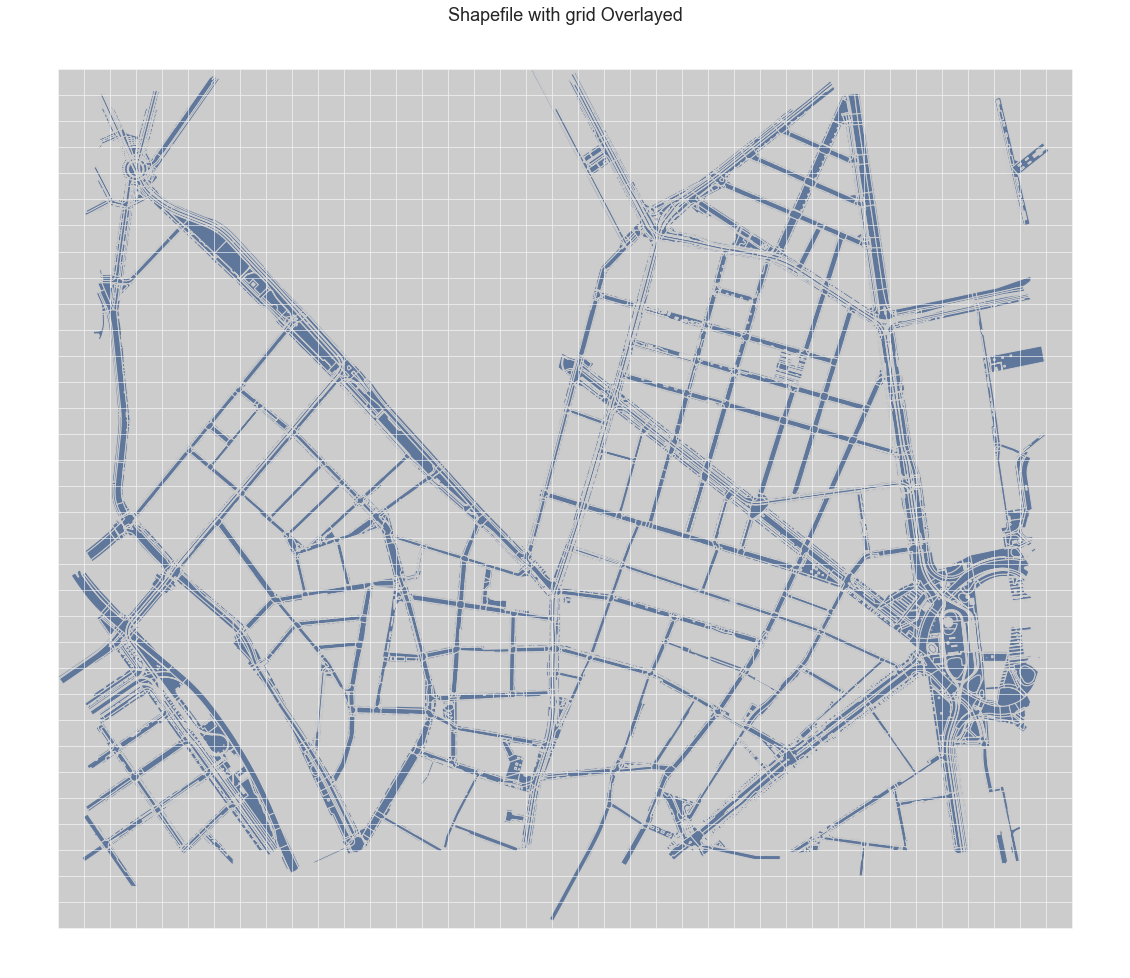

In [27]:
f, ax = plt.subplots(figsize=(20, 20))
road_map_at.plot(ax=ax)
grid.plot(ax=ax, color="gray", alpha=0.4)
ax.set(title="Shapefile with grid Overlayed")
ax.set_axis_off()
plt.show()

Clip each square and save the result into filesystem

       ANFANGDATU BAUKENN BAUKENN_TX BELAG     BELAG_TXT BEZIRK BORDSTA  \
10966  2013-05-28    None       None    AB  Asphaltbeton     20    None   
10965  2013-05-28    None       None    AB  Asphaltbeton     20    None   
10964  2013-05-28    None       None    AB  Asphaltbeton     20    None   
10960  2017-10-05    None       None    AB  Asphaltbeton     20    None   
14115  2017-10-05       U      Umbau    AB  Asphaltbeton     20    None   
10959  2013-05-28    None       None    KB    kein Belag     20       1   
10961  2020-03-05    None       None    AB  Asphaltbeton     20    None   
10963  2017-10-05       U      Umbau    AB  Asphaltbeton     20    None   
14118  2017-10-05    None       None    AB  Asphaltbeton     20    None   
10962  2013-05-28    None       None    AB  Asphaltbeton     20    None   

      ERHALTUNG                 ERHALTUNG_  FLAECHE  ... TYPE       TYPE_TXT  \
10966      MA28  Straßenbau und Verwaltung   44.267  ...   GG       Gehsteig   
10965      MA2

c:\Users\jcarvajal\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


       ANFANGDATU BAUKENN         BAUKENN_TX BELAG  \
12044  2013-05-28    None               None    HS   
12110  2014-08-25    None               None    HS   
12111  2013-05-28    None               None    AB   
13601  2013-05-28    None               None    AB   
13600  2014-08-25    None               None    GA   
13602  2013-05-28    None               None    GA   
13603  2013-05-28    None               None    GA   
13605  2020-01-27    None               None    GA   
13604  2015-11-27       B  Belagsaufbringung    GA   
13599  2018-09-21    None               None    RA   
13606  2013-05-28    None               None    GA   
13514  2013-05-28    None               None    ST   
13515  2013-05-28    None               None    AB   
12095  2013-05-28    None               None    ST   
12096  2013-05-28    None               None    AB   
12043  2013-05-28    None               None    GA   
12104  2020-01-27    None               None    GA   
12047  2013-05-28    None   

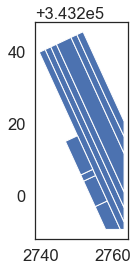

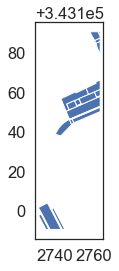

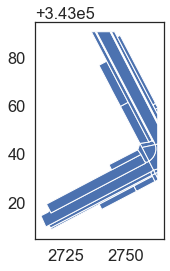

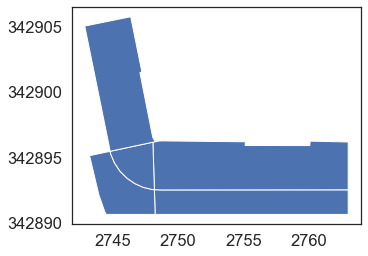

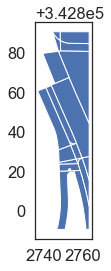

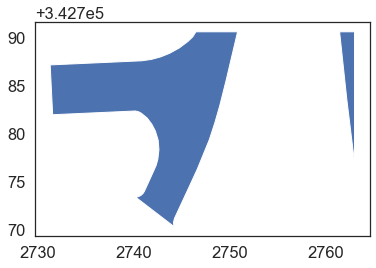

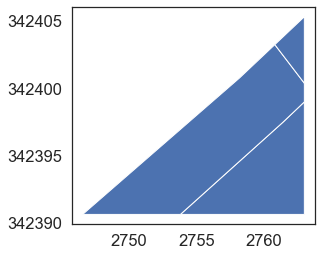

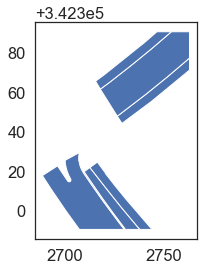

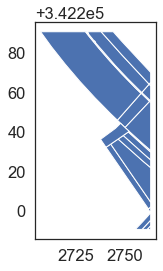

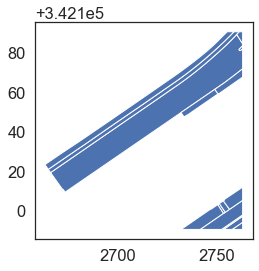

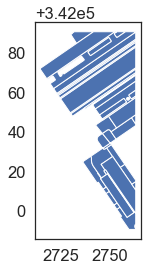

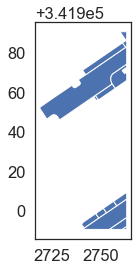

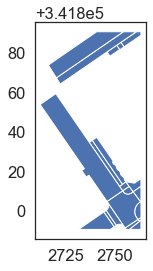

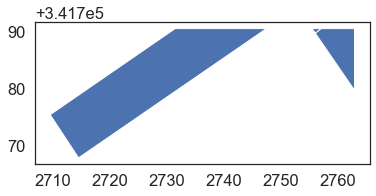

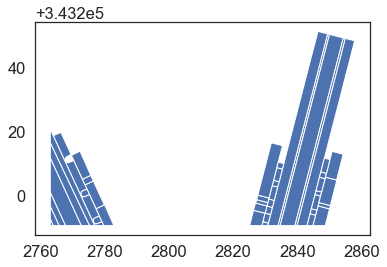

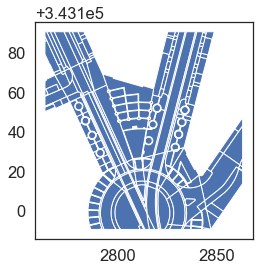

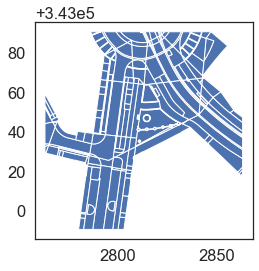

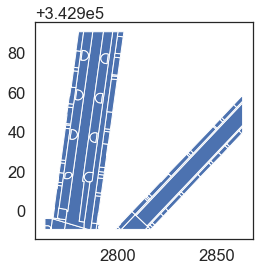

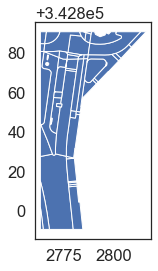

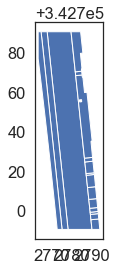

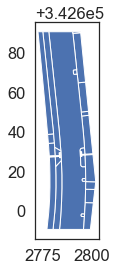

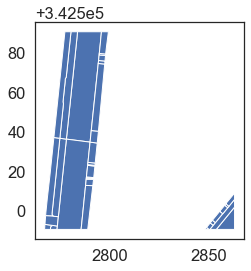

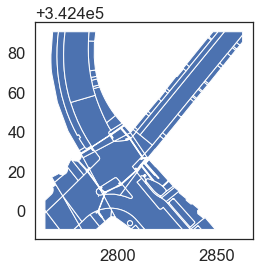

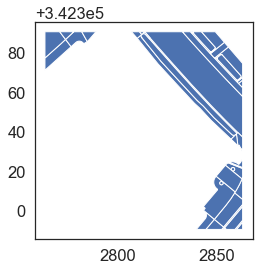

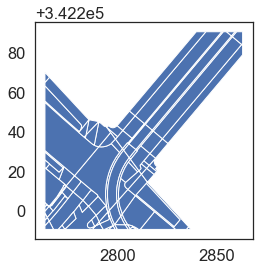

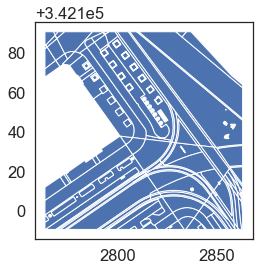

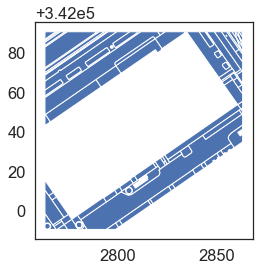

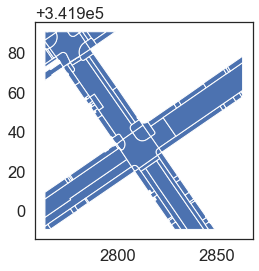

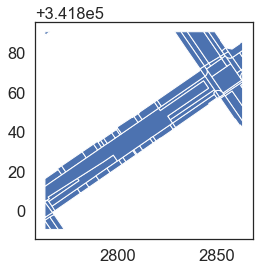

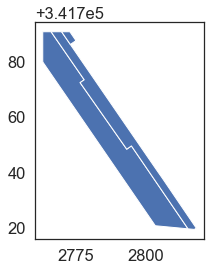

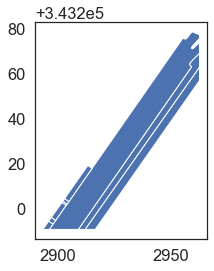

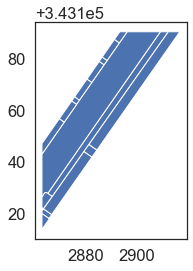

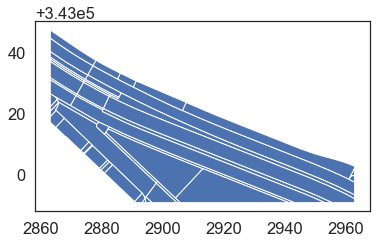

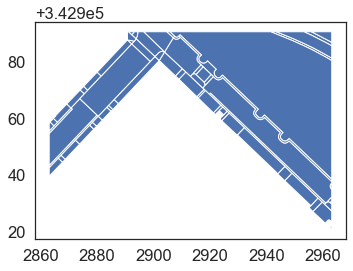

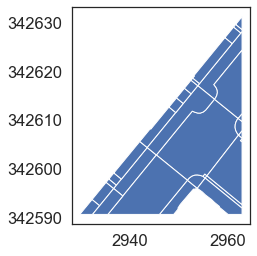

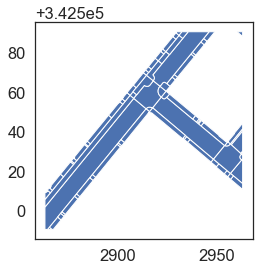

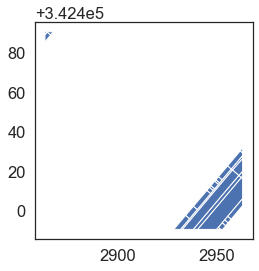

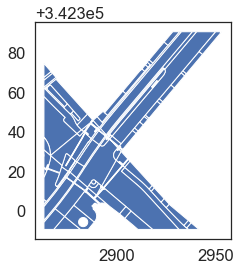

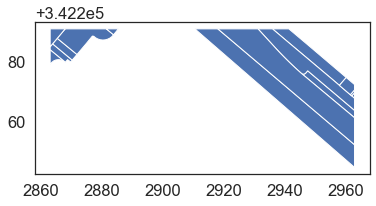

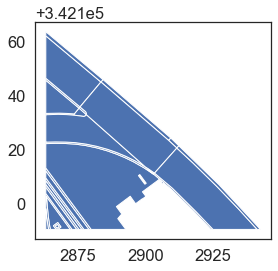

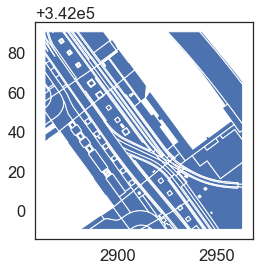

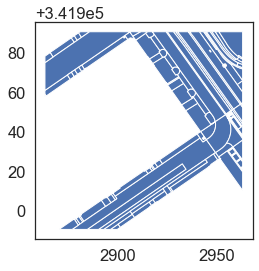

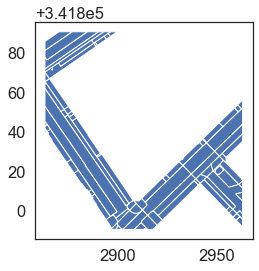

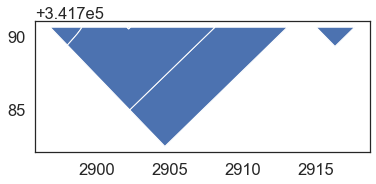

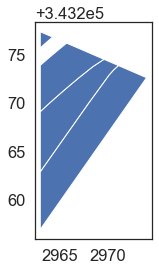

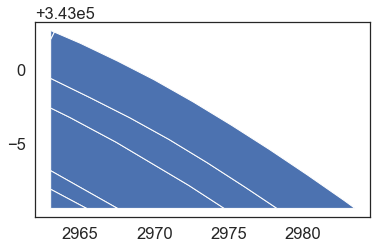

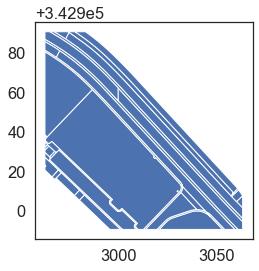

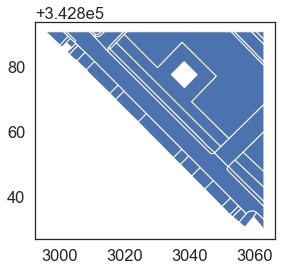

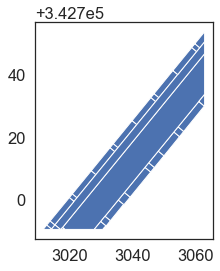

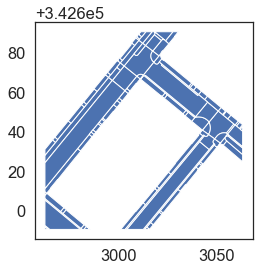

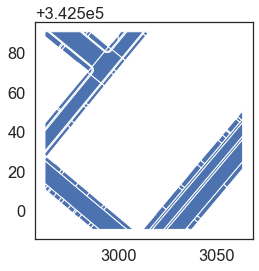

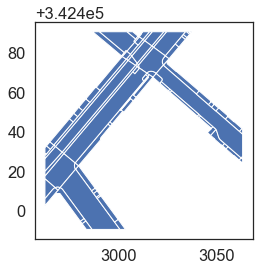

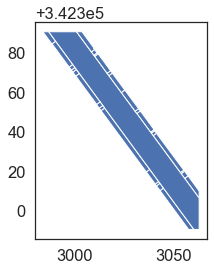

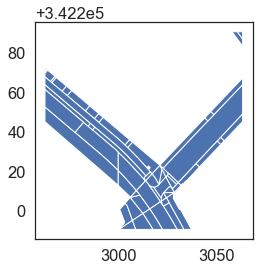

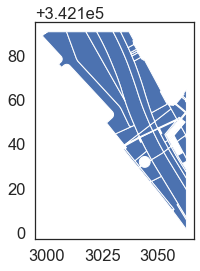

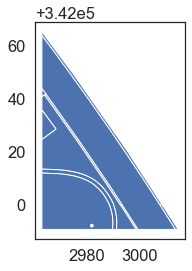

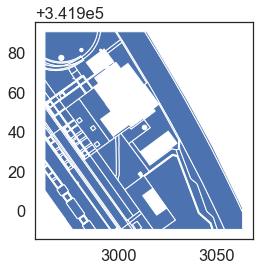

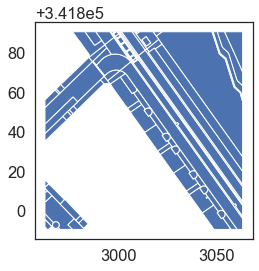

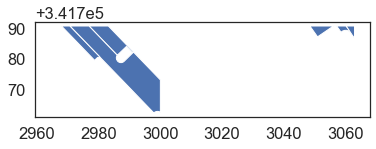

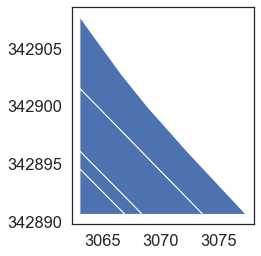

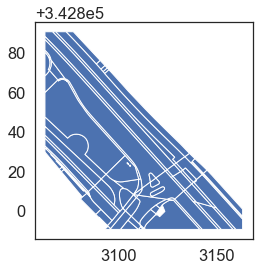

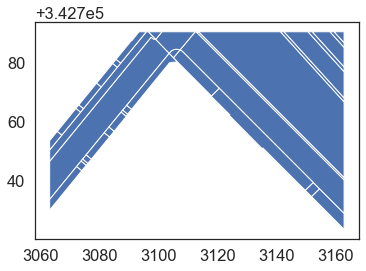

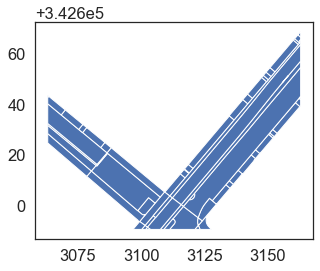

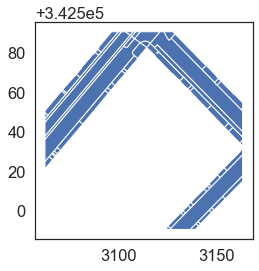

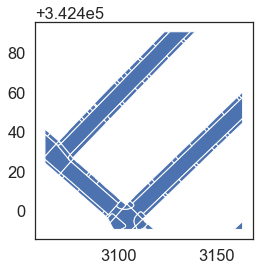

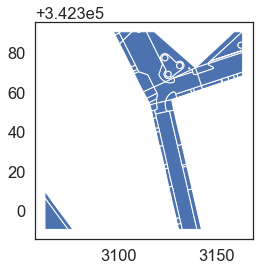

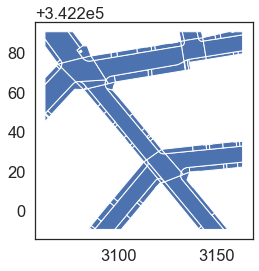

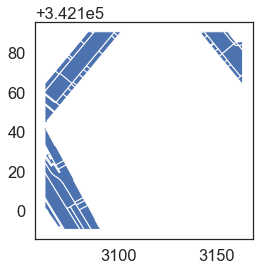

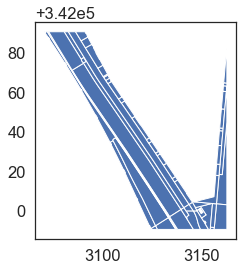

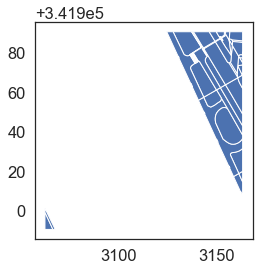

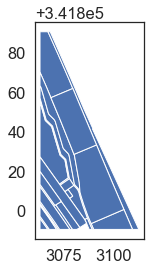

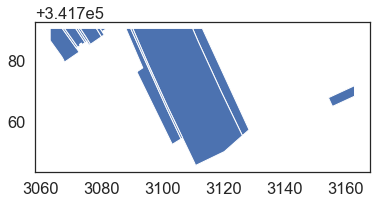

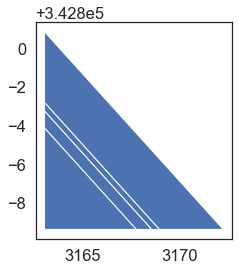

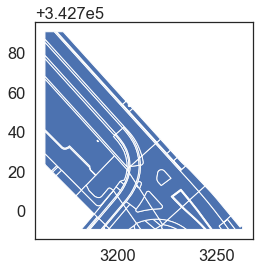

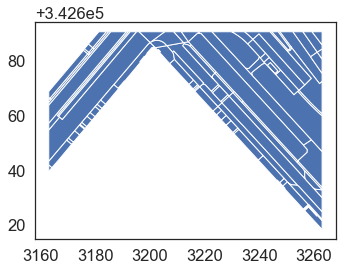

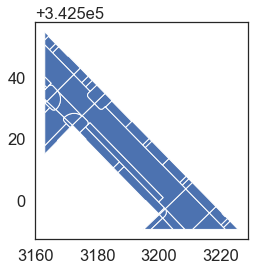

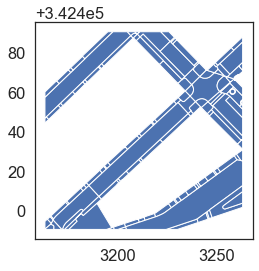

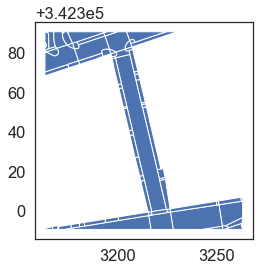

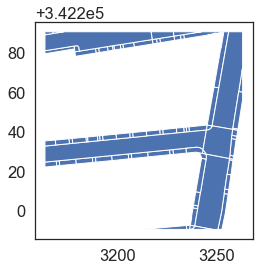

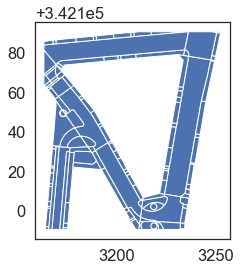

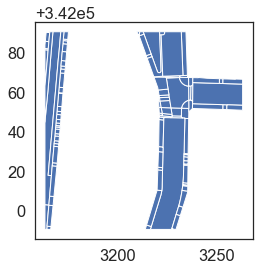

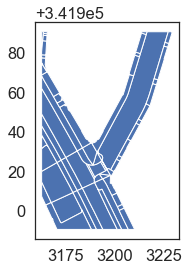

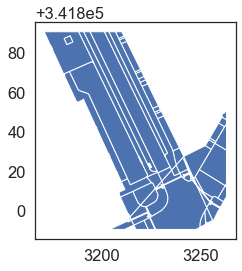

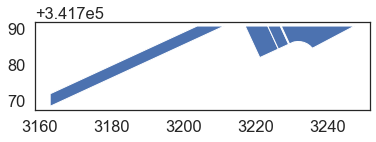

In [40]:
for x in range(0,17*6):
  cell=grid.loc[x, ('geometry')]
  map_clipped = gpd.clip(road_map_at,cell)
  if(map_clipped.empty):
    print("The next cell does not contain any type of information: ",x)
  else:
    map_clipped.plot()
    #print(map_clipped)
    os.mkdir('resultados/mi_resultado%s'%x)
    map_clipped.to_file("resultados/mi_resultado%s/MiResultado%s.shp"%(x,x) , mode="w")

Check the information of a part

In [5]:
road_map_clipped = gpd.read_file("resultados\mi_resultado19\MiResultado19.shp")
road_map_clipped

ANFANGDATU BAUKENN         BAUKENN_TX BELAG  \
0    2020-03-05    None               None    AB   
1    2015-02-26    None               None    AB   
2    2020-09-09       B  Belagsaufbringung    AB   
3    2013-05-28    None               None    AB   
4    2013-05-28    None               None    GA   
..          ...     ...                ...   ...   
273  2019-09-30    None               None    KL   
274  2013-05-28    None               None    AB   
275  2013-05-28    None               None    RA   
276  2013-05-28    None               None    GO   
277  2013-05-28    None               None    GO   

                           BELAG_TXT BEZIRK BORDSTA ERHALTUNG  \
0                       Asphaltbeton     20    None        WL   
1                       Asphaltbeton     02    None      MA28   
2                       Asphaltbeton     20    None      MA28   
3                       Asphaltbeton     20       3      MA28   
4               Gussasphalt Gehsteig     20    None      MA28   
..                               ...    ...     ...       ...   
273               Kleinsteinpflaster     20    None      MA28   
274                     Asphaltbeton     02       4      MA28   
275      Hartgussasphalt gesplittert     02    None      MA28   
276  Großsteinpfl. ohne Fugenverguss     02    None      MA28   
277  Großsteinpfl. ohne Fugenverguss     02    None      MA28   

                    ERHALTUNG_  FLAECHE  ... TYPE             TYPE_TXT  \
0                Wiener Linien   27.288  ...   IS                Insel   
1    Straßenbau und Verwaltung   41.357  ...   GG             Gehsteig   
2    Straßenbau und Verwaltung   24.735  ...   FF             Fahrbahn   
3    Straßenbau und Verwaltung    1.525  ...   GG             Gehsteig   
4    Straßenbau und Verwaltung    3.657  ...   GG             Gehsteig   
..                         ...      ...  ...  ...                  ...   
273  Straßenbau und Verwaltung    0.184  ...   GG             Gehsteig   
274  Straßenbau und Verwaltung  372.114  ...   RW     Radweg (baulich)   
275  Straßenbau und Verwaltung  735.594  ...   FF             Fahrbahn   
276  Straßenbau und Verwaltung  462.613  ...   PA  Parkfläche Fahrbahn   
277  Straßenbau und Verwaltung  474.390  ...   PA  Parkfläche Fahrbahn   

      UMFANG  UPDATEDATU  VERWALTUNG                 VERWALTUN0 WERTIGKEIT  \
0     35.959  2022-08-07        MA28  Straßenbau und Verwaltung          L   
1     28.514  2022-08-07        MA28  Straßenbau und Verwaltung          L   
2     22.888  2022-08-07        MA28  Straßenbau und Verwaltung          L   
3      6.284  2022-08-07        MA28  Straßenbau und Verwaltung          L   
4      8.287  2022-08-07        MA28  Straßenbau und Verwaltung          L   
..       ...         ...         ...                        ...        ...   
273    2.847  2022-08-07        MA28  Straßenbau und Verwaltung          L   
274  268.390  2022-08-07        MA28  Straßenbau und Verwaltung          L   
275  281.430  2022-08-07        MA28  Straßenbau und Verwaltung          L   
276  313.520  2022-08-07        MA28  Straßenbau und Verwaltung          L   
277  327.911  2022-08-07        MA28  Straßenbau und Verwaltung          L   

       WERTIGKEI0    SE_SDO_ROW  \
0    Landesstraße  2.043309e+09   
1    Landesstraße  2.043268e+09   
2    Landesstraße  2.043268e+09   
3    Landesstraße  2.043291e+09   
4    Landesstraße  2.043268e+09   
..            ...           ...   
273  Landesstraße  2.043338e+09   
274  Landesstraße  2.043270e+09   
275  Landesstraße  2.043236e+09   
276  Landesstraße  2.042929e+09   
277  Landesstraße  2.043270e+09   

                                              geometry  
0    POLYGON ((2841.835 343058.486, 2840.480 343059...  
1    POLYGON ((2847.664 343063.790, 2849.650 343062...  
2    POLYGON ((2840.752 343065.647, 2841.325 343064...  
3    POLYGON ((2841.934 343065.647, 2842.585 343066...  
4    POLYGON ((2840.752 343065.647, 2839.763 343066...  
..        

In [9]:
print("same crs?", road_map_clipped.crs == road_map_at.crs)
print(road_map_clipped.crs)

same crs? True
epsg:31256
